### Please write your name and student ID
- **Name**: Mohammad Mehdi Shamekhi
- **Studet ID**: 400522382
- **Course**: IUST-Vision-2025

##### [Use Google Colab for easier access to the dataset]

# Part A) MNIST Dataset Classification
- In this notebook we will use Keras/Tensorflow to classify MNIST dataset using simple Fully Connected layers (called "dense layers" in Tensorflow)

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout, Input, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Conv2D
from keras.optimizers import Adam ,RMSprop
from keras.utils import to_categorical, plot_model
from keras import  backend as K

# MNIST dataset

- MNIST is a dataset of handwritten digits (from 0 to 9).

- training set: 60,000 images, test set: 10,000 images

- To use the MNIST dataset in Keras, an API is provided to download.

### Loading MNIST

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Print the number of train and test data

In [ ]:
print(f"Number of train data is: {x_train.shape[0]}")
print(f"Number of test data is: {x_test.shape[0]}")

Number of train data is: 60000
Number of test data is: 10000


## Visualize some samples from the train data

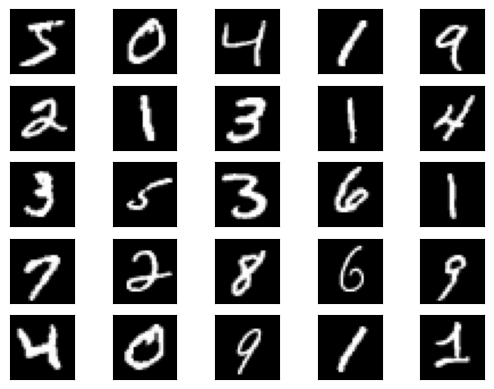

In [ ]:
for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(x_train[i], cmap='gray')
      plt.xticks([])
      plt.yticks([])

## Print number of classes

In [ ]:
num_labels = np.unique(y_train).shape[0]
print(num_labels)

10


# Data Pre-processing

## One-Hot Encoding

- Now the labels are in digits format, 0 to 9.

- This is not suitable for the neural network. why? because prediction layer, outputs probabilities per class. and we cant compare it with true labels which are digits.

- A more suitable format is called a one-hot vector, a 10 element vector with all elements 0, except for the index of the digit class (for example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]).

In [ ]:
# convert to one hot
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

## Data Preprocessing <a class="anchor" id="5.4"></a>


- In deep learning, data is stored in tensors (search and learn about it)

- Now we will compute the image dimensions (input_size of the first Fully Connected layer)

- Then we will scale each pixel value from 0 to 255 to range from 0.0 to 1.0 (normalization)
  raw pixel values can be used too, but it is better to normalize the input data as to avoid large gradient values that could make training difficult.

- The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying
  the output tensor by 255.  

- The proposed model is based on MLP layers. So the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 * 28] and [10000, 28 * 28], respectively.

## Print first layer size

In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

## Resize and Normalize X_train and X_test

In [ ]:
x_train = x_train.reshape(x_train.shape[0], input_size)
x_train = x_train.astype(np.float32)
x_train /= 255

x_test = x_test.reshape(x_test.shape[0], input_size)
x_test = x_test.astype(np.float32)
x_test /= 255

# Building the model

## Setting network parameters

- The **batch_size** indicates the number of data that we will use for each update of the model parameters.

- **Hidden_units** shows the number of hidden units (neurons in hidden layer).

In [ ]:
batch_size = 200
hidden_units = 256

## Designing the model architecture

In [ ]:
# create a 3 layer MLP with ReLU after each layer
model = Sequential()
model.add(Input(shape=(input_size,)))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=num_labels, activation='softmax'))

- A Dense layer is a linear operation, a sequence of linear operations is a linear operation and can only approximate a linear function.

- The problem is that the MNIST digit classification is a non-linear process. Adding a ReLu activation between Dense layers will enable MLPs to model non-linear mapping.

## View model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

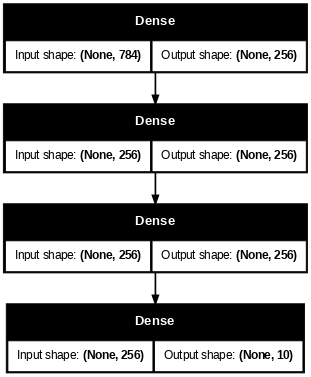

<Figure size 500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(5, 5))
plot_model(model, to_file='mlp-mnist.png', show_shapes=True, dpi=60)

# Implement MLP model using Keras


- Steps:

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.

## Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer Adam)

- With optimization, the objective is to minimize the loss function.

- The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**.

- Each optimizer features tunable parameters like learning rate, momentum, and decay.

- In the proposed classifier network, you should use Adam since it has the highest test accuracy.

### Metrics (Accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

- During training, validation, and testing, other metrics such as **accuracy** can also be included.

- **Accuracy** is the percent of correct predictions based on ground truth.

## Train the model

In [ ]:
history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=20,
                        validation_split=0.1,
                        shuffle=True,
                        verbose=1)

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9873 - val_loss: 0.0492
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9883 - val_loss: 0.0436
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9882 - val_loss: 0.0426
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 1.0000 - loss: 8.8409e-04 - val_accuracy: 0.9892 - val_loss: 0.0407
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 7.4854e-04 - val_accuracy: 0.9890 - val_loss: 0.0428
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 6.6344e-0

## Evaluating model performance

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.1165

Test accuracy: 97.9%


## Plot Training & Validation history

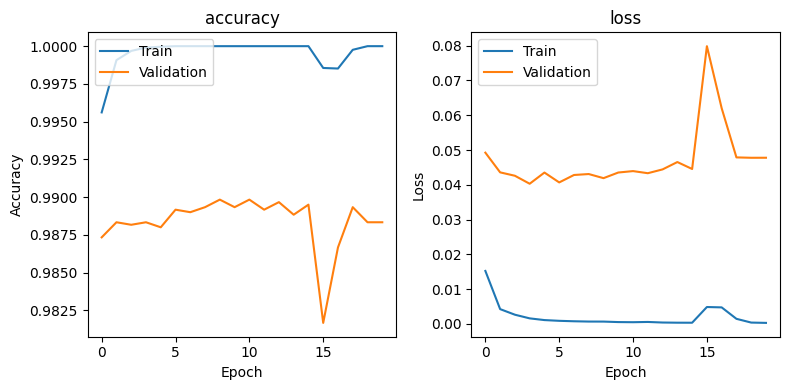

In [ ]:
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 969    1    0    0    1    1    3    1    3    1]
 [   0 1125    3    1    0    1    2    1    2    0]
 [   4    2 1006    6    1    0    2    4    6    1]
 [   0    0    5  986    0    5    0    4    2    8]
 [   1    0    5    0  958    0    4    2    1   11]
 [   1    0    0    9    1  870    5    0    5    1]
 [   6    3    0    1    4    4  940    0    0    0]
 [   1    4    8    2    2    0    0 1001    6    4]
 [   3    1    4    5    1    3    2    2  950    3]
 [   2    2    0    6    7    4    1    2    2  983]]


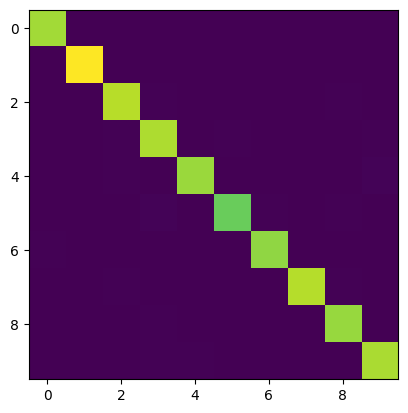

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

### Questions:

- Why Train accuracy and loss are getting much better than the validation? What is happenin?
- Why validation loss started increasing again after decreasing?
- What can we change in model architecture to solve this and get better validation results?


#### Write your answers here (not in the doc), Finglish is ok:

In [ ]:
# 1) be in dalil mitavanad bashad ke model ba data train yad migirad. data train ra mibinad va rooye on test ham mikonad. dar hali ke
#    data validation ra nemibinad. data train momken hast k namayande khoobi as data validation nabashad. size kam dar data validation niz
#    mitavanad. dar khorooji mesal ma taghriban nazdikan. age kh fargh konan yani model amalan dade train ro hefz karde va overfit shode.

# 2) in neshane in hast ke overfiting darad rokh midahad. chera k amalan deghat on rooye dade validation darad kam mishavad k aksaran
#    dar dade train bishtar shode.

# 3) mitavan as tecnik haye ke overfiting ra kam mikonand estefade konim mesle dropout ke yek seri as noron ha ra moghe train khamoosh konad.
#    agar kh model deep hast va masale kh picheede nist, omghash ra kamtar karde. mitavan as afzoodan dade ya data augmentation estefade kard.


#Part B) Run the same model on the **CIFAR10 dataset** and explain why the results differ.

### Loading CIFAR10

In [ ]:
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Print the number of train and test data

In [ ]:
print(f"Number of train data is: {x_train.shape[0]}")
print(f"Number of test data is: {x_test.shape[0]}")

Number of train data is: 50000
Number of test data is: 10000


## Visualize some samples from the train data

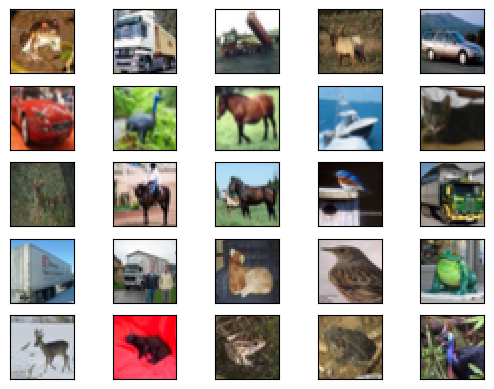

In [ ]:
for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(x_train[i], cmap='gray')
      plt.xticks([])
      plt.yticks([])

## Print number of classes

In [ ]:
num_labels = np.unique(y_train).shape[0]
print(num_labels)

10


In [ ]:
# convert to one hot
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

## Print first layer size

In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size * x_train.shape[3]
input_size

3072

## Normalizing

In [ ]:
x_train = x_train.reshape(x_train.shape[0], input_size)
x_train = x_train.astype(np.float32)
x_train /= 255

x_test = x_test.reshape(x_test.shape[0], input_size)
x_test = x_test.astype(np.float32)
x_test /= 255

## Building the model

In [ ]:
batch_size = 200
hidden_units = 256

In [ ]:
# create a 3 layer MLP with ReLU after each layer
model = Sequential()
model.add(Input(shape=(input_size,)))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=num_labels, activation='softmax'))

## Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=20,
                        validation_split=0.1,
                        shuffle=True,
                        verbose=1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.2586 - loss: 2.0477 - val_accuracy: 0.3604 - val_loss: 1.8040
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3770 - loss: 1.7576 - val_accuracy: 0.4080 - val_loss: 1.6849
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.4140 - loss: 1.6588 - val_accuracy: 0.4220 - val_loss: 1.6448
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.4340 - loss: 1.6039 - val_accuracy: 0.4350 - val_loss: 1.6048
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4505 - loss: 1.5437 - val_accuracy: 0.4544 - val_loss: 1.5658
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4610 - loss: 1.5184 - val_accuracy: 0.4510 - val_loss: 1.5534
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.4781 - loss: 1.4777 - val_accuracy: 0.4712 - val_loss: 1.5033
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4889 - loss: 1.4503 - val_ac

## Evaluating model performance

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5184 - loss: 1.3784

Test accuracy: 51.3%


## Plot Training & Validation history

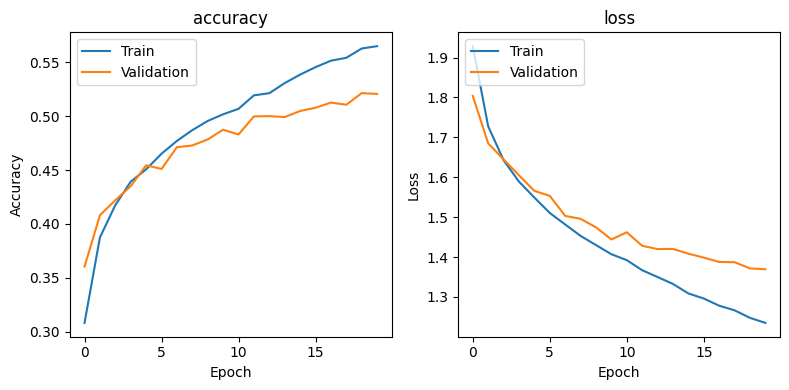

In [ ]:
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[569  45  76  15  12  12  21  13 201  36]
 [ 32 698  12  18   8  14  17  11 100  90]
 [ 71  27 494  76  73  68 107  29  43  12]
 [ 37  41 110 338  34 182 150  30  45  33]
 [ 62  20 237  63 351  42 129  39  46  11]
 [ 28  23 143 206  48 361  89  37  48  17]
 [ 11  24 106  63  66  45 633  12  27  13]
 [ 53  24 105  79  69  70  44 462  38  56]
 [ 81  72  17  17  11  14   6   7 739  36]
 [ 49 231  20  33   9  20  16  27 112 483]]


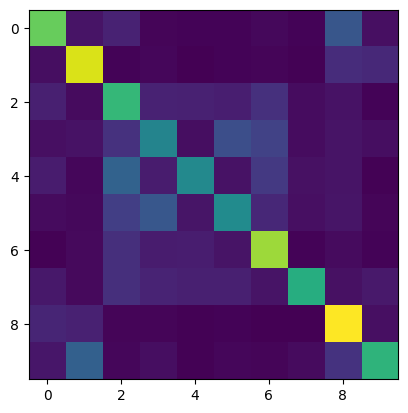

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)